In [1]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages


gc.collect()

0

In [9]:
BMBR_path="../../../OLD_CORY/sds_vs_peptide/BMRB_experimental_data/"
PPSpred_path="../04_predict_2str_PSSpred/data/"

experiments=BMBR.load_BMBR(BMBR_path)
secondary_structure=BMBR.load_PSSpred_structure(PPSpred_path)

4697 .


In [13]:
partially_disordered={}
entries=['51418','19284','26823','25077','15254']
for entry in entries:
    partially_disordered[entry]={}
    partially_disordered[entry]["full"]={}
    partially_disordered[entry]["disordered"]={}
    for condition in experiments[entry]['T2measur']:
        for measurament,data in experiments[entry]['T2measur'][condition].items():
            #print(entry,measurament,data['results'])
            field=data['field']
            try:
                effTimes=[]
                for R2 in data['results']['R2']:
                    effTimes.append(srt.find_tau_from_R2_np_poly1d(float(field),float(R2)))
                partially_disordered[entry]['full'][field]={}
                partially_disordered[entry]['full'][field]['residues']=data['results']["atomID"]
                partially_disordered[entry]['full'][field]['residuesReal']=data['results']["atomIDreal"]
                partially_disordered[entry]['full'][field]['effTimes']=np.array(effTimes)*10**9
            except:
                pass
        
partially_disordered['EN2']={}
partially_disordered['EN2']['full']={}
partially_disordered['EN2']['full']['800']={}
partially_disordered['EN2']['full']['800']['residues']=[]
partially_disordered['EN2']['full']['800']['effTimes']=[]
with open('EN2_R2_exp.dat','r') as file:
    for line in file:
        partially_disordered['EN2']['full']['800']['residues'].append(int(line.split()[0]))
        partially_disordered['EN2']['full']['800']['effTimes'].append(srt.find_tau_from_R2_np_poly1d(800,float(line.split()[1]))*10**9)
partially_disordered['EN2']['full']['800']['residuesReal']=partially_disordered['EN2']['full']['800']['residues']        
partially_disordered['tonB']={}
partially_disordered['tonB']['full']={}
partially_disordered['tonB']['full']['850']={}
partially_disordered['tonB']['full']['850']['residues']=[]
partially_disordered['tonB']['full']['850']['effTimes']=[]
with open('tonB_experimentalDATAT1T2NOE.dat','r') as file:
    for line in file:
        if '%' in line:
            pass
        elif not len(line.split())==7:
            pass
        elif not line.split()[3]=='nan':
            partially_disordered['tonB']['full']['850']['residues'].append(int(line.split()[0]))
            partially_disordered['tonB']['full']['850']['effTimes'].append(srt.find_tau_from_R2_np_poly1d(850,1/float(line.split()[3]))*10**9)        
            
partially_disordered['tonB']['full']['850']['residuesReal']=partially_disordered['tonB']['full']['850']['residues']
partially_disordered['25077']['full'][599.427]['residuesReal']=list(np.array(partially_disordered['25077']['full'][599.427]['residuesReal'])+493)
partially_disordered['15254']['full'][720]['residuesReal']=list(np.array(partially_disordered['15254']['full'][720]['residues'])+105)

In [27]:
#foramt: ID: [structured, disordered, magnetic field]
entries={'51418':[[(5,82),(138,-1)],[(83,128),(129,137)],800,[(60,76),(80,84),(96,101),(106,116),
                                                              (121,140),(144,163),(348,365),(368,373),
                                                              (389,394),(399,409),(414,432),(436,456)],
          [],'BRD4'],
         '19284':[[(0,68)],[(68,-1)],600,[(3,83)],[],'δ subunit'],
         '26823':[[(41,51)],[(0,34),(65,-1)],850,[(321,331)],[],'TDP-43'],
         '25077':[[(8,78)],[(85,-1)],599.427,[(515,604)],[],'PDZ-linker'],
         '15254':[[(26,-1)],[(8,23)],720,[(154,158),(179,183)],[(163,167),(189,192),(193,198),(199,205),
                                                                (207,214),(219,223)],'Pr-SH3'],
         'EN2':[[(24,30),(57,-5)],[(0,19),(34,52)],'800',[],[],'EN2'],
         'tonB':[[(52,-2)],[(0,51)],'850',[],[],'TonB']}


#The real velues below; values used above are for the purposes of plotting, so that
#    the lines do not merge into one....
#'51418':[[(5,82),(138,-1)],[(83,128),(129,137)],800,[(60,76),(80,84),(96,101),(106,116),
#                                                              (121,140),(144,163),(348,365),(368,373),
#                                                              (389,394),(399,409),(414,432),(436,456)]],
                                                              
 #[[(5,82),(138,-1)],[(83,128),(129,137)],800,[(60,76),(79,88),(92,101),(106,116),
 #                                                             (121,140),(144,163),(348,365),(368,373),
 #                                                             (389,394),(399,409),(414,432),(436,456)]],                                                             

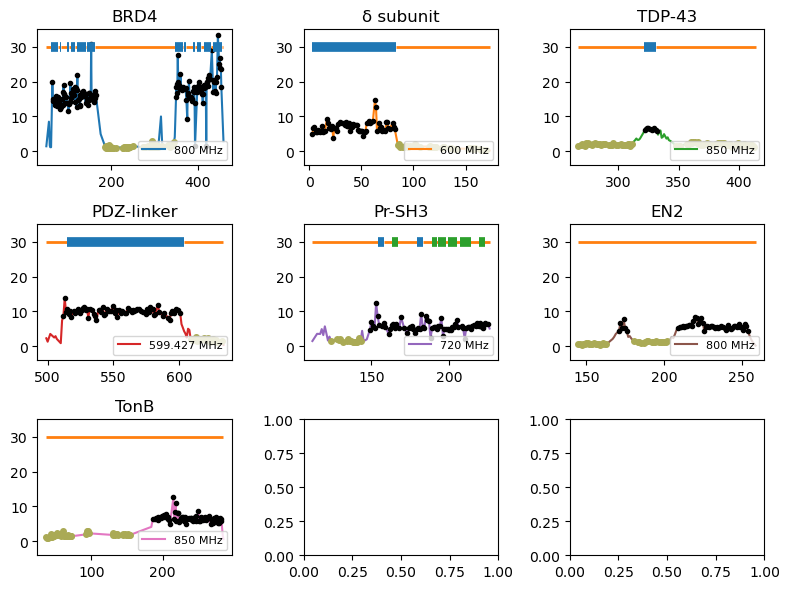

In [28]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,3,figsize=(8,6))
for i,entry in enumerate(partially_disordered):
    field=entries[entry][2]
    if not len(partially_disordered[entry]['full'][field]['residuesReal'])>0:
        axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'],partially_disordered[entry]['full'][field]['effTimes'],label=str(field)+' MHz',c='C'+str(i))
        for limits in entries[entry][0]:
            beg=limits[0]
            end=limits[1]
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',c='black')

        for limits in entries[entry][1]:
            beg=limits[0]
            end=limits[1]
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',markersize=8,c='#aaaa55')
    else:
        axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residuesReal'],partially_disordered[entry]['full'][field]['effTimes'],label=str(field)+' MHz',c='C'+str(i))
        for limits in entries[entry][0]:
            beg=limits[0]
            end=limits[1]
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residuesReal'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',c='black')

        for limits in entries[entry][1]:
            beg=limits[0]
            end=limits[1]
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residuesReal'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',markersize=8,c='#aaaa55')

    try:
        start=partially_disordered[entry]['full'][field]['residuesReal'][0]
        for helix in entries[entry][3]:
            if helix[0]>start:
                xs=[start,helix[0]]
                axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1",solid_capstyle='butt')
            start=helix[1]
            xs=[helix[0],helix[1]]
            axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=7,c="C0",solid_capstyle='butt')
        if start<partially_disordered[entry]['full'][field]['residuesReal'][-1]:
            xs=[start,partially_disordered[entry]['full'][field]['residuesReal'][-1]]
            axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1",solid_capstyle='butt')
        for helix in entries[entry][4]:
            xs=[helix[0],helix[1]]
            axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=7,c="C2",solid_capstyle='butt')
    except Exception as e:
        pass
    axs[i//3,i%3].legend(prop={'size':8},loc=4)
    axs[i//3,i%3].set_ylim(-4,35)
    if entry=='EN2':
        axs[i//3,i%3].legend(loc=4,prop={'size':8})
    axs[i//3,i%3].set_title(entries[entry][5])
plt.savefig('suitable_partially_disordered_big_field.pdf')

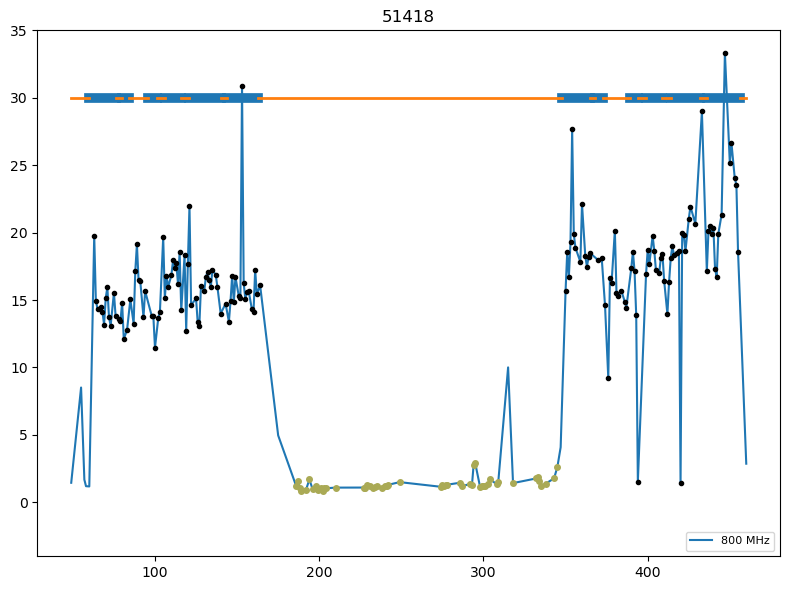

In [112]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1,1,figsize=(8,6))
for i,entry in enumerate(partially_disordered):
    if entry=='51418':
        field=entries[entry][2]
        if not len(partially_disordered[entry]['full'][field]['residuesReal'])>0:
            axs.plot(partially_disordered[entry]['full'][field]['residues'],partially_disordered[entry]['full'][field]['effTimes'],label=str(field)+' MHz',c='C'+str(i))
            for limits in entries[entry][0]:
                beg=limits[0]
                end=limits[1]
                axs.plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',c='black')

            for limits in entries[entry][1]:
                beg=limits[0]
                end=limits[1]
                axs.plot(partially_disordered[entry]['full'][field]['residues'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',markersize=8,c='#aaaa55')
        else:
            axs.plot(partially_disordered[entry]['full'][field]['residuesReal'],partially_disordered[entry]['full'][field]['effTimes'],label=str(field)+' MHz',c='C'+str(i))
            for limits in entries[entry][0]:
                beg=limits[0]
                end=limits[1]
                axs.plot(partially_disordered[entry]['full'][field]['residuesReal'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',c='black')

            for limits in entries[entry][1]:
                beg=limits[0]
                end=limits[1]
                axs.plot(partially_disordered[entry]['full'][field]['residuesReal'][beg:end],partially_disordered[entry]['full'][field]['effTimes'][beg:end],'.',markersize=8,c='#aaaa55')

        try:
            start=partially_disordered[entry]['full'][field]['residuesReal'][0]
            for helix in entries[entry][3]:
                #if helix[0]>start:
                #    xs=[start,helix[0]]
                #    axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1")
                #    start=helix[1]
                xs=[helix[0],helix[1]]
                axs.plot(xs,[30]*2,'-',linewidth=7,c="C0")
            for helix in entries[entry][3]:
                if helix[0]>start:
                    xs=[start,helix[0]]
                    axs.plot(xs,[30]*2,'-',linewidth=2,c="C1")
                start=helix[1]
            if start<partially_disordered[entry]['full'][field]['residuesReal'][-1]:
                xs=[start,partially_disordered[entry]['full'][field]['residuesReal'][-1]]
                axs.plot(xs,[30]*2,'-',linewidth=2,c="C1")
        except Exception as e:
            pass
        axs.legend(prop={'size':8},loc=4)
        axs.set_ylim(-4,35)
        if entry=='EN2':
            axs.legend(loc=4,prop={'size':8})
        axs.set_title(entry)

In [111]:
for entry in entries:
    field=entries[entry][2]
    start=partially_disordered[entry]['full'][field]['residuesReal'][0]
    for helix in entries[entry][3]:
            #if helix[0]>start:
            #    xs=[start,helix[0]]
            #    axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1")
            #    start=helix[1]
        xs=[helix[0],helix[1]]
        axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=7,c="C0")
        print(f'ID: {entry}, helix: {xs}')
    for helix in entries[entry][3]:
        if helix[0]>start:
            xs=[start,helix[0]]
            axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1")
        start=helix[1]
        print(f'ID: {entry}, disordered: {xs}')
    if start<partially_disordered[entry]['full'][field]['residuesReal'][-1]:
        xs=[start,partially_disordered[entry]['full'][field]['residuesReal'][-1]]
        axs[i//3,i%3].plot(xs,[30]*2,'-',linewidth=2,c="C1")

ID: 51418, helix: [60, 76]
ID: 51418, helix: [80, 84]
ID: 51418, helix: [96, 101]
ID: 51418, helix: [106, 116]
ID: 51418, helix: [121, 140]
ID: 51418, helix: [144, 163]
ID: 51418, helix: [348, 365]
ID: 51418, helix: [368, 373]
ID: 51418, helix: [389, 394]
ID: 51418, helix: [399, 409]
ID: 51418, helix: [414, 432]
ID: 51418, helix: [436, 456]
ID: 51418, disordered: [49, 60]
ID: 51418, disordered: [76, 80]
ID: 51418, disordered: [84, 96]
ID: 51418, disordered: [101, 106]
ID: 51418, disordered: [116, 121]
ID: 51418, disordered: [140, 144]
ID: 51418, disordered: [163, 348]
ID: 51418, disordered: [365, 368]
ID: 51418, disordered: [373, 389]
ID: 51418, disordered: [394, 399]
ID: 51418, disordered: [409, 414]
ID: 51418, disordered: [432, 436]
ID: 19284, helix: [3, 83]
ID: 19284, disordered: [3, 83]
ID: 26823, helix: [321, 331]
ID: 26823, disordered: [267, 321]


IndexError: list index out of range

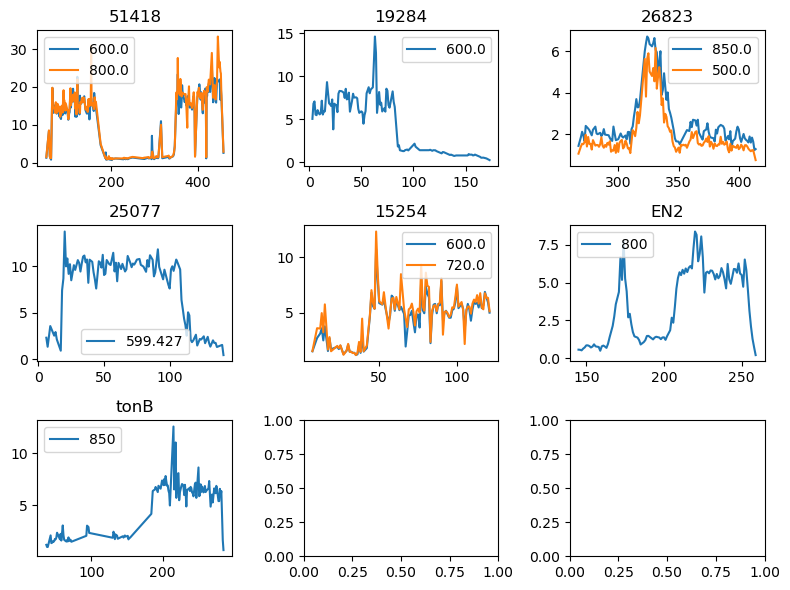

In [65]:
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(3,3,figsize=(8,6))
for i,entry in enumerate(partially_disordered):
    for field in partially_disordered[entry]['full']:
        if len(partially_disordered[entry]['full'][field]['residuesReal'])>0:
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residuesReal'],partially_disordered[entry]['full'][field]['effTimes'],label=field)
        else:
            axs[i//3,i%3].plot(partially_disordered[entry]['full'][field]['residues'],partially_disordered[entry]['full'][field]['effTimes'],label=field)
    axs[i//3,i%3].legend()
    axs[i//3,i%3].set_title(entry)

In [130]:
for condition,data_con in experiments['25077']['T2measur'].items():
    print(condition)
    for meas in data_con:
        print(meas)

$sample_conditions_2
heteronuclear_T2_list_1


In [62]:
partially_disordered['15254']['full'][600]

{'residues': [7,
  10,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  23,
  24,
  25,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  53,
  54,
  56,
  57,
  58,
  59,
  60,
  61,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121],
 'residuesReal': [],
 'effTimes': array([ 1.49949738,  2.70152268,  3.10393371,  3.57906408,  2.48566911,
         3.75093253,  1.5291408 ,  2.68058942,  1.68588139,  1.90841643,
         1.70410387,  2.01571321,  1.2464629 ,  1.55208236,  2.09357269,
         1.47088154,  1.45694194,  1.37184221,  1.36566494,  1.1719393 ,
         1.23091577,  2.08021801,  1.35953706,  

In [74]:
[30]*2

[30, 30]